# Kaggle Project: streeteasy-dataset ( 맨하탄 집값 예측)
## Describe My Dataset
### URL: https://www.kaggle.com/datasets/zohaib30/streeteasy-dataset
### Task: 

1. 필요한 library를 import
2. 데이터셋 생성 및 분할
3. 모델 정의: Neural Network
4. 각 모델 학습 및 검증
5. Test data를 통한 최종 성능 평가
Datasets : 전체 데이터를 train: test = 8:2의 비율로 분할

### Features(x):

rental ID

rent : price of rent in dollars

bedrooms : number of bedrooms

bathrooms : number of bathrooms

size_sqft : size in square feet

min_to_subway : distance from subway station in minutes

floor : floor number

building_age_yrs : building’s age in years

no_fee : have a broker fee? (0 for fee, 1 for no fee) 

has_roofdeck : have a roof deck? (0 for no, 1 for yes)

has_washer_dryer : have washer/dryer in unit? (0 for no, 1 for yes)

has_doorman : (0 for no, 1 for yes)

has_elevator : (0 for no, 1 for yes)

has_dishwasher : (0 for no, 1 for yes)

has_patio : (0 for no, 1 for yes)

has_gym : (0 for no, 1 for yes)

neighborhood

borough


### Target(y): rent

## Data preprocessing

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import r2_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/streeteasy-dataset/manhattan.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         3539 non-null   int64  
 1   rent              3539 non-null   int64  
 2   bedrooms          3539 non-null   float64
 3   bathrooms         3539 non-null   int64  
 4   size_sqft         3539 non-null   int64  
 5   min_to_subway     3539 non-null   int64  
 6   floor             3539 non-null   float64
 7   building_age_yrs  3539 non-null   int64  
 8   no_fee            3539 non-null   int64  
 9   has_roofdeck      3539 non-null   int64  
 10  has_washer_dryer  3539 non-null   int64  
 11  has_doorman       3539 non-null   int64  
 12  has_elevator      3539 non-null   int64  
 13  has_dishwasher    3539 non-null   int64  
 14  has_patio         3539 non-null   int64  
 15  has_gym           3539 non-null   int64  
 16  neighborhood      3539 non-null   object 


## 데이터 구성 확인

In [3]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [4]:
for col in df.columns:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print('=' * 100)

Column: rental_id
rental_id
1545    1
361     1
9295    1
1191    1
2953    1
       ..
2171    1
1307    1
9579    1
8900    1
4718    1
Name: count, Length: 3539, dtype: int64
Column: rent
rent
3500    77
3800    59
4500    53
4000    51
3200    41
        ..
2745     1
3940     1
5256     1
4748     1
6675     1
Name: count, Length: 854, dtype: int64
Column: bedrooms
bedrooms
1.0    1476
2.0     969
0.0     642
3.0     327
4.0      75
0.5      24
2.5       8
1.5       8
5.0       7
3.5       3
Name: count, dtype: int64
Column: bathrooms
bathrooms
1    2420
2     930
3     165
4      13
0       9
5       2
Name: count, dtype: int64
Column: size_sqft
size_sqft
600     103
800     102
700      98
500      80
650      79
       ... 
1616      1
2145      1
444       1
1101      1
816       1
Name: count, Length: 1019, dtype: int64
Column: min_to_subway
min_to_subway
2     754
3     562
4     436
1     370
5     338
6     273
7     181
8     129
10    117
9     111
12     66
43     51
11

### 데이터 결측치 확인

In [5]:
missing_values = df.isnull().sum()
print(missing_values)

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64


[Text(0, 0, 'Upper East Side'),
 Text(1, 0, 'Greenwich Village'),
 Text(2, 0, 'Midtown'),
 Text(3, 0, 'Soho'),
 Text(4, 0, 'Central Harlem'),
 Text(5, 0, 'Midtown East'),
 Text(6, 0, 'Battery Park City'),
 Text(7, 0, 'Flatiron'),
 Text(8, 0, 'East Village'),
 Text(9, 0, 'Midtown West'),
 Text(10, 0, 'Upper West Side'),
 Text(11, 0, 'Lower East Side'),
 Text(12, 0, 'Tribeca'),
 Text(13, 0, 'Gramercy Park'),
 Text(14, 0, 'East Harlem'),
 Text(15, 0, 'West Village'),
 Text(16, 0, 'Central Park South'),
 Text(17, 0, 'Chelsea'),
 Text(18, 0, 'Financial District'),
 Text(19, 0, 'Inwood'),
 Text(20, 0, 'Midtown South'),
 Text(21, 0, 'Washington Heights'),
 Text(22, 0, 'Chinatown'),
 Text(23, 0, 'Roosevelt Island'),
 Text(24, 0, 'Hamilton Heights'),
 Text(25, 0, 'Stuyvesant Town/PCV'),
 Text(26, 0, 'Morningside Heights'),
 Text(27, 0, 'Little Italy'),
 Text(28, 0, 'Nolita'),
 Text(29, 0, 'West Harlem'),
 Text(30, 0, 'Long Island City'),
 Text(31, 0, 'Manhattanville')]

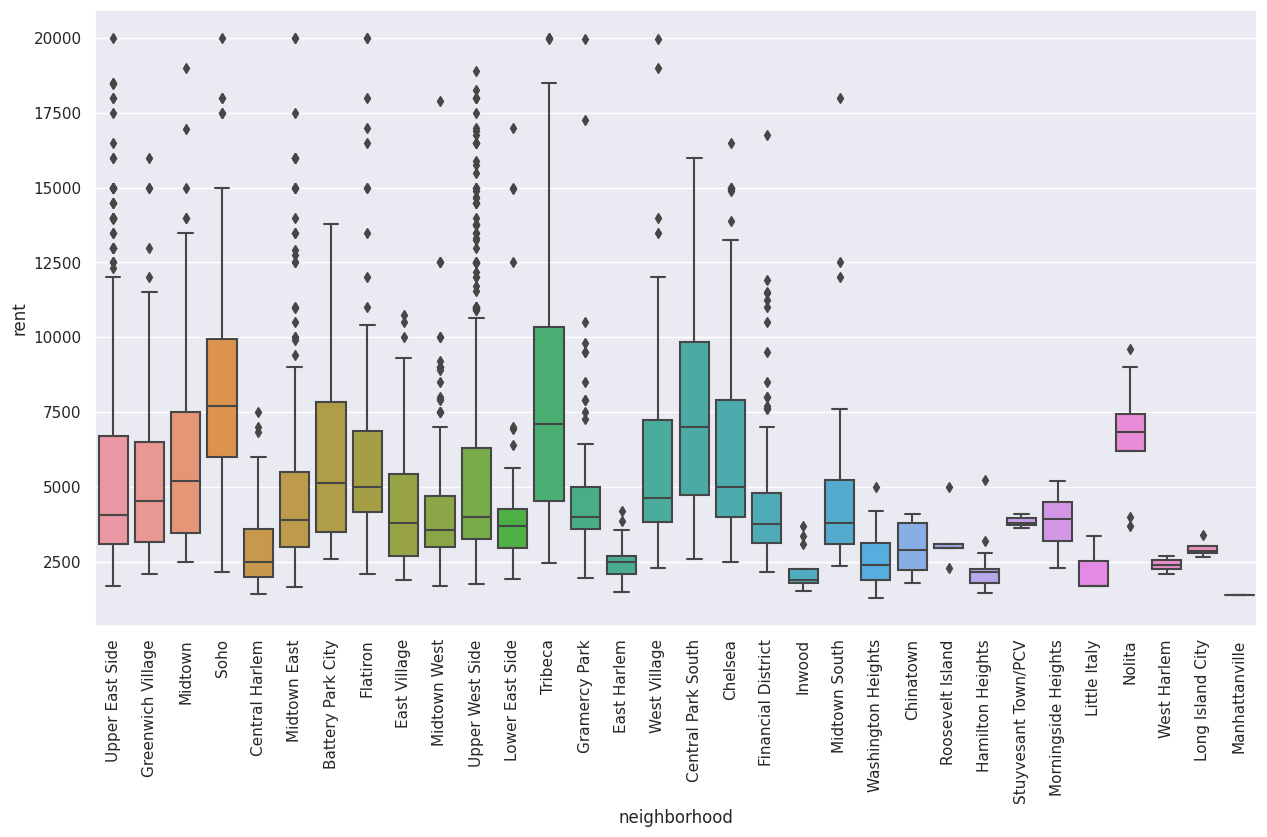

In [6]:
sns.set(rc={'figure.figsize': (15,8)})
myplot = sns.boxplot(data =df , x ='neighborhood',y ='rent')
myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

### 불필요한 데이터 정리

* borough : 자치구
* rental_id : 방번호

In [7]:
df = df.drop(['borough','rental_id'],axis = 1)

In [8]:
df

,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood
0,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side
1,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village
2,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown
3,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village
4,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,4210,1.0,1,532,3,8.0,16,1,1,1,1,1,1,0,1,Chelsea
3535,6675,2.0,2,988,5,10.0,9,1,1,1,1,1,1,0,1,Tribeca
3536,1699,0.0,1,250,2,5.0,96,0,0,0,0,0,0,0,0,Little Italy
3537,3475,1.0,1,651,6,5.0,14,1,0,1,1,1,1,0,1,Midtown West


# Model Construction

## 데이터 나누기 : Train data : Test Data (8:2)

In [9]:
#데이터를 특성과 타겟으로 분리
X = df.drop('rent', axis=1)
y = df['rent']

In [10]:
# 데이터를 train, test 세트로 분할 (8:2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the new sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2831, 15)
X_test shape: (708, 15)
y_train shape: (2831,)
y_test shape: (708,)


In [11]:
# 원 핫 인코딩
ohe = OneHotEncoder(sparse=False)
train_ohe_df = ohe.fit_transform(X_train[['neighborhood']])
train_ohe_df = pd.DataFrame(train_ohe_df)
train_ohe_df.columns = ohe.categories_[0]
train_ohe_df.index = X_train.index

test_ohe_df = ohe.transform(X_test[['neighborhood']])
test_ohe_df = pd.DataFrame(test_ohe_df)
test_ohe_df.columns = ohe.categories_[0]
test_ohe_df.index = X_test.index

print('train_ohe_df', train_ohe_df.shape)
print('test_ohe_df', test_ohe_df.shape)
print('X_train', X_train.shape)
print('X_test', X_test.shape)

train_ohe_df (2831, 32)
test_ohe_df (708, 32)
X_train (2831, 15)
X_test (708, 15)


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
X_train = pd.concat([X_train, train_ohe_df], axis = 1)
X_train = X_train.drop(['neighborhood'] ,axis = 1)

X_test = pd.concat([X_test, test_ohe_df], axis = 1)
X_test = X_test.drop(['neighborhood'], axis = 1)

In [13]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (2831, 46)
X_test (708, 46)


In [14]:
#데이터 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Train Model & Select Model (Neural Network model)

In [15]:
# 데이터를 PyTorch Tensor로 변환 (데이터를 PyTorch Tensor로 변환하고, DataLoader를 생성하는 과정)

# torch.tensor를 사용하여 NumPy 배열을 PyTorch Tensor로 변환

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

In [16]:
# TensorDataset을 사용하여 데이터와 대상을 결합 
# (PyTorch에서 제공하는 클래스로, 입력 데이터와 대상을 하나로 묶어주는 역할)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# DataLoader를 사용하여 배치 처리 (PyTorch에서 제공하는 배치 처리를 용이하게 해주는 클래스)

# 훈련 데이터와 테스트 데이터에 대해 각각 DataLoader를 생성
# 'batch_size'는 각 미니배치의 크기를 나타냄
# 'shuffle=True'는 훈련 데이터를 에폭마다 섞을지 여부를 결정 
# 테스트 데이터는 섞을 필요가 없으므로 'shuffle=False'로 설정

batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [17]:
# 4개의 선형 레이어 (self.fc1, self.fc3, self.fc4, self.fc2)

# 입력층 (self.fc1) : input_size

# 은닉층 1 (self.fc3) : hidden_size

# 은닉층 2 (self.fc4) : hidden_size

# 은닉층 3 (self.fc2) : hidden_size//2

# 출력층 (self.fc2): 1

#  은닉층에서 ReLU 활성화 함수를 사용

# 평균 제곱 오차 (MSE) 손실 함수를 최소화하는 방향으로 Adam 옵티마이저를 사용하여 모델이 훈련

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size )
        self.fc4 = nn.Linear(hidden_size, hidden_size//2)
        self.fc2 = nn.Linear( hidden_size//2 , output_size)
        

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [18]:
# 모델 초기화와 훈련 (Neural Network)
input_size = X_train.shape[1]
hidden_size = 64
output_size = 1  
neural_model = NeuralNetwork(input_size, hidden_size, output_size)

# 손실 함수와 옵티마이저 정의
criterion = nn.MSELoss()
optimizer = optim.Adam(neural_model.parameters(), lr=0.001)

In [19]:
# num_epochs 설정을 100

#  Epoch 반복 "for epoch in range(num_epochs)"

#  모델을 학습 상태로 설정  "neural_model.train()"
    
#  평균 손실 초기화 "total_loss = 0"

#  미니배치 반복 "for inputs, labels in train_dataloader"

#  기울기 초기화 "optimizer.zero_grad()"
       
#  순전파 "outputs = neural_model(inputs)"
       
        
#  손실 계산 "loss = criterion(outputs.view(-1), labels)"
        
#  역전파 "loss.backward()"
    
        
#  최적화 "optimizer.step()"

#  총 손실 누적 "total_loss += loss.item()"

#  평균 손실 계산 및 출력
#     "average_loss = total_loss / len(train_dataloader)"
#     "print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss:.4f}")"


# 모델 훈련 (Neural network model)
num_epochs = 100
for epoch in range(num_epochs):
    neural_model.train()
    total_loss = 0
    for inputs, labels in train_dataloader:
        optimizer.zero_grad()
        outputs = neural_model(inputs)
        loss = criterion(outputs.view(-1), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

   
    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss:.4f}")

Epoch 1/100, Average Training Loss: 36343658.2222
Epoch 2/100, Average Training Loss: 35795831.2667
Epoch 3/100, Average Training Loss: 32991781.8222
Epoch 4/100, Average Training Loss: 21498824.0667
Epoch 5/100, Average Training Loss: 7091316.8111
Epoch 6/100, Average Training Loss: 2746664.6639
Epoch 7/100, Average Training Loss: 2245370.2625
Epoch 8/100, Average Training Loss: 2191150.4375
Epoch 9/100, Average Training Loss: 2034912.1597
Epoch 10/100, Average Training Loss: 2037476.9722
Epoch 11/100, Average Training Loss: 1911597.9236
Epoch 12/100, Average Training Loss: 2015194.8701
Epoch 13/100, Average Training Loss: 1828213.4458
Epoch 14/100, Average Training Loss: 1796165.8181
Epoch 15/100, Average Training Loss: 1752002.3833
Epoch 16/100, Average Training Loss: 1735875.1569
Epoch 17/100, Average Training Loss: 1678815.3528
Epoch 18/100, Average Training Loss: 1766863.0861
Epoch 19/100, Average Training Loss: 1638437.1875
Epoch 20/100, Average Training Loss: 1622154.6306
Epoch

## Performance

In [20]:
# 최종 테스트 데이터로 모델 평가 (Neural Network)
neural_model.eval()
with torch.no_grad():
    predictions = neural_model(X_test_tensor)
    test_loss = criterion(predictions.view(-1), y_test_tensor)

print(f"Mean Squared Error on Test Set: {test_loss.item()}")

# Calculate R-squared on the test set
test_r2 = r2_score(y_test_tensor, predictions.view(-1))
print(f"R-squared on Test Set: {test_r2}")

Mean Squared Error on Test Set: 1795861.375
R-squared on Test Set: 0.8096027164392281


## 중간고사 프로젝트 결과 
### Linear regression의 손실함수 값: 2,207,072
### Decision tree의 손실함수 값: 2,890,416

### Linear regression이 더 적합하다.

## 기말고사 프로젝트 결과
### Neural network의 손실함수 값 : 1,795,861
### Neural network의 R-squared on Test Set: 0.8096

### 손실 함수 값 (Mean Squared Error, MSE):

손실 함수 값이 작을수록 모델의 예측이 실제 값과 가까움


MSE는 예측 값과 실제 값 간의 평균 제곱 오차를 나타내는 지표이며, 작을수록 모델의 성능이 더 좋음


### R-squared (결정 계수):

R-squared 값은 예측된 값이 종속 변수의 분산을 얼마나 잘 설명하는지를 측정하는 지표
R-squared 값은 0에서 1 사이의 값을 가지며,

1에 가까울수록 모델이 데이터를 잘 설명하고 있는 것
높은 R-squared 값은 모델이 주어진 데이터에 대해 잘 적합되었다는 것



### "주어진 손실 함수 값이 작고, R-squared 값이 1에 가까우면 모델이 훈련된 데이터에 적합하다"

## 결론
### 중간고사 프로젝트 Linear regression보다 

### 기말고사 프로젝트 Neural network의 손실함수 값이 더 낮아졌기에 성능이 향상되었음을 알 수 있다.